# COGS 108 - Final Project 

# Overview

In this project, I examine San Diego parks and identify safety concerns of park-goers. When one goes to the park with family and friends, it is essential for the park to be a safe and happy place. One way to identify and further understand safety concerns is to find out the experience of park-goers. This project utilizes sentiment analysis on Yelp reviews regarding park equipment, restrooms, playgrounds, and secure environments to analyze and identify these park-goers' specific concerns from negative reviews and ratings, albeit the parks had 5-star ratings overall.

# Name & GitHub ID

- Name: Elaha Shamal
- GitHub Username: Eshamal

# Research Question

Utilizing Yelp reviews and performing sentiment analysis, can we identify San Diego park-goers safety concerns?

## Background and Prior Work

I was surprised to find an article about the garbage located in Balboa Park. “Newspapers and barbershop bottles and anchovy cans and frozen dinners, all thrown away by a mid-century generation of San Diegans, sitting and stinking in the middle of a park, in the middle of the city. You might never know the dirt-covered, uneven acres between Pershing Drive and Florida Drive are hiding mountains of trash”. This article made me wonder if there is more garbage hidden in other parks as well (1).  
  
There are a few statistics that show residents don’t use San Diego parks because of safety and cleanliness. “according to a survey given to residents. About 64 percent said they don’t feel safe in the area and listed safety, cleanliness, and noise as the park’s main issues” (2).   
  
I watched a YouTube video posted by ABC 10 news that talked about San Diego parks playgrounds. “Only 5 playgrounds have been inspected in San Diego in the last 23 years this is one of the big problems found in an audit of the park and recreation department(3).
  
  References:
  
  1)https://www.voiceofsandiego.org/parks/the-garbage-dump-hiding-in-balboa-park/
  
  2)https://www.sandiegouniontribune.com/communities/san-diego/sd-me-park-curfews-20190318-story.html
  
  3)https://www.youtube.com/watch?v=34XNWfLfBzE

# Hypothesis


I hypothesize that residents and park-goers will post reviews on yelp in concern for their safety.  
  
  Parks are a place that families and kids go; therefore, their safety is a priority and a major concern. Considering these reviews, San Diego's park and recreation department will want to take these concerns seriously and make a safe environment for park-goers.

# Dataset(s)

The yelp dataset has columns of yelp text reviews and ratings. The reviews will be from individuals who are concerned about their safety and had a bad experience. I will have two observations, the good reviews, and the bad reviews. I will be focusing mostly on negative reviews. I think I will be able to find the data I need by searching for the specific words in the reviews.
- Source: https://www.yelp.com/  
- Dataset (CSV, Reviews): yelp_SD_reviews.csv  
- Reviews: https://www.yelp.com/developers/documentation/v3/business_reviews

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import nltk

In [2]:
# get lexicon 
nltk.download('vader_lexicon') 
## import word tokenizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elahashamal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df_yelp =  pd.read_csv('yelp_SD_reviews.csv')

In [4]:
#Break text down (tokenize) into smaller chunks
nltk.download('punkt')
df_yelp['token'] = df_yelp['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elahashamal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# To fix the lookup error produced by this cell
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# look at stop words
print(stop_words)

{'being', 'wasn', 'or', 'no', 'he', 'weren', 'ours', 'if', "mustn't", 'is', 'which', "you've", "wasn't", 'whom', "shan't", 'me', 'these', 'other', 'should', 've', 'until', 'yourselves', 'from', 'did', 'my', 'hers', 's', 'didn', 'isn', 'to', 'any', 'than', 'through', "don't", 'those', "hadn't", 'ma', 'were', 'up', 'this', 'it', 'the', 'their', 'couldn', 'during', 'into', 'above', 'her', "hasn't", 'you', 'him', 'your', 'themselves', 'myself', 'why', 'out', 'his', 'just', 'does', "should've", 'below', "didn't", 'doesn', 'be', 'against', 'now', "you'd", 'won', 'because', 'o', "you'll", 'am', 'itself', 'needn', 'while', 'after', 't', 'some', 'having', 'ain', 'hadn', 'are', 'yours', 'off', 'own', 'them', 'nor', 'very', 'in', "that'll", 'most', 'don', 'mightn', 'more', 'was', 'have', "mightn't", 'of', 'doing', 'and', 'here', 'so', 'only', "doesn't", 'but', "couldn't", 'haven', 'd', 'same', "haven't", 'at', 'aren', 'ourselves', "you're", 'will', "she's", 'an', 'few', "wouldn't", "won't", 'hers

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elahashamal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning

I didn't have to change the columns to clean it in the original data frame because it had only three columns, id, text, and ratings. I did some cleaning up the 'text' column by removing incidents of '\r', '\n' and, '\n\n'. I removed the stop words. I added new columns stem, positive, negative, neutral, and compound, which I need for my sentiment analysis. I created a function that will output a data frame, which stores sentiment information. I created another function that allows me to search for specific words in the text reviews. With this cleaning, I can make the data frame shorter to see the reviews more clearly and discover reviewers' concerns. Now the data frame is ready to be used.

In [6]:
# Cleaning up the 'text' column by removing incidents of '\r', '\n' and, '\n\n'
df_yelp['text'] = df_yelp['text'].apply(lambda x: x.replace('\n',' ')) 
df_yelp['text'] = df_yelp['text'].apply(lambda x: x.replace('\r',' '))
df_yelp['text'] = df_yelp['text'].apply(lambda x: x.replace('\n\n',' '))

In [7]:
# remove stop words
df_yelp['stop'] = df_yelp['token'].apply(lambda x: [item for item in x if item not in stop_words])
df_yelp.head()

,id,rating,text,token,stop
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,"[Balboa, Park, is, a, must, see, when, coming,...","[Balboa, Park, must, see, coming, San, Diego, ..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,"[Beautiful, grounds, even, to, take, a, stroll...","[Beautiful, grounds, even, take, stroll, Covid..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,"[Beautiful, sightseeing, in, San, Diego, ., Lo...","[Beautiful, sightseeing, San, Diego, ., Lots, ..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,"[Was, invited, to, child, 's, B-Day, party, pr...","[Was, invited, child, 's, B-Day, party, pre, C..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...","[Pretty, nice, park, ,, beautiful, design, ., ...","[Pretty, nice, park, ,, beautiful, design, ., ..."


In [8]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [9]:
df_yelp['stem'] = df_yelp['stop'].apply(lambda x: [ps.stem(y) for y in x])
df_yelp.head()

,id,rating,text,token,stop,stem
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,"[Balboa, Park, is, a, must, see, when, coming,...","[Balboa, Park, must, see, coming, San, Diego, ...","[balboa, park, must, see, come, san, diego, .,..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,"[Beautiful, grounds, even, to, take, a, stroll...","[Beautiful, grounds, even, take, stroll, Covid...","[beauti, ground, even, take, stroll, covid, 's..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,"[Beautiful, sightseeing, in, San, Diego, ., Lo...","[Beautiful, sightseeing, San, Diego, ., Lots, ...","[beauti, sightse, san, diego, ., lot, walkway,..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,"[Was, invited, to, child, 's, B-Day, party, pr...","[Was, invited, child, 's, B-Day, party, pre, C...","[wa, invit, child, 's, b-day, parti, pre, covi..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...","[Pretty, nice, park, ,, beautiful, design, ., ...","[Pretty, nice, park, ,, beautiful, design, ., ...","[pretti, nice, park, ,, beauti, design, ., any..."


In [10]:
# get series of all words after stemming
stem_df_yelp = df_yelp['stem'].apply(pd.Series).stack()

In [11]:
from nltk.probability import FreqDist
import string
# calculation word frequency
fdist_df= FreqDist(stem_df_yelp)
# remove punctuation counts
for punc in string.punctuation:
    del fdist_df[punc]

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [13]:
# Some text taken from yelp review
analyser.polarity_scores(""""Great place! Went here with the family to walk around and enjoy the
fresh air at night! There was a ton of people doing the same thing! Very nice place to walk, relax
and look at the stars. We really enjoyed the older looking buildings and architectural structures. 
This the nations oldest parks. I believe they have a
lot of Spanish Influence in the design of the buildings and park.""")

{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.9641}

In [14]:
# get list of the 'sentences' (reviews) from each individual
df_yelplist = list(df_yelp['text'].values)

In [15]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):

    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [16]:
analyser = SentimentIntensityAnalyzer()

# get sentiment measures
df_yelp_sentiments = get_sentiments(df_yelplist)

df_yelp = df_yelp.drop(['token', 'stop'], axis = 1)\
.assign(pos = df_yelp_sentiments['pos'])\
.assign(neg = df_yelp_sentiments['neg'])\
.assign(neu = df_yelp_sentiments['neu'])\
.assign(compound = df_yelp_sentiments['compound'])


#print the dataframe
df_yelp.head()

,id,rating,text,stem,pos,neg,neu,compound
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,"[balboa, park, must, see, come, san, diego, .,...",0.091,0.0,0.909,0.4215
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,"[beauti, ground, even, take, stroll, covid, 's...",0.379,0.0,0.621,0.9001
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,"[beauti, sightse, san, diego, ., lot, walkway,...",0.443,0.0,0.557,0.9360
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,"[wa, invit, child, 's, b-day, parti, pre, covi...",0.326,0.0,0.674,0.8916
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...","[pretti, nice, park, ,, beauti, design, ., any...",0.493,0.0,0.507,0.9610


In [17]:
#allows me to search for specific words in the text reviews.
def sort_df(word):
    new = df_yelp[df_yelp['text'].str.contains(word, case=False)]
    new = new.reset_index(drop = True)
    new_list = list(new['text'].values)
    new_sentiments = get_sentiments(new_list)

    new = new.assign(pos = new_sentiments['pos'])
    new = new.assign(neg = new_sentiments['neg'])
    new = new.assign(neu = new_sentiments['neu'])
    new = new.assign(compound = new_sentiments['compound'])

    return new

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

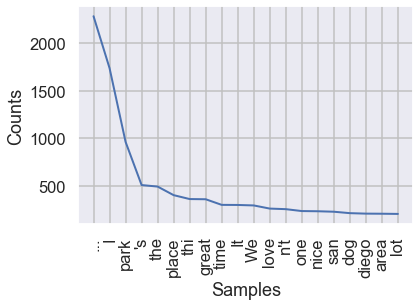

In [18]:
# Frequency Distribution Plot - top 20
# for words in what yelp reviewers like most
fdist_df.plot(20, cumulative=False)

Text(0.5, 0, 'sentiment analysis')

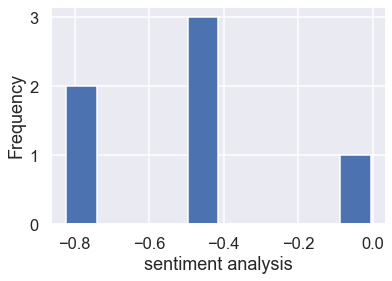

In [19]:
# sort data frame by keyword broken and plot histogram of sentiment scores
df_broken = sort_df('broken')
df_broken['compound'].plot.hist()
plt.xlabel('sentiment analysis')

In [20]:
# this line of code shows more of the review texts
pd.set_option('display.max_colwidth', None)

In [21]:
# it prints the data frame and the review text based on the keyword.
df_yelp[df_yelp['text'].str.contains('broken')]

,id,rating,text,stem,pos,neg,neu,compound
1531,Villa De La Paz,1,Terrible management roach infested apartments. Countless things broken or never replaced. It's cheap rent for a reason!,"[terribl, manag, roach, infest, apart, ., countless, thing, broken, never, replac, ., It, 's, cheap, rent, reason, !]",0.000,0.317,0.683,-0.7574
1755,Clay Associates,5,I had a vintage discontinued Ceramic Tureen. You can imagine how I felt when it slipped out of my hands and broke into a million pieces. I was heartbroken....,"[I, vintag, discontinu, ceram, tureen, ., you, imagin, I, felt, slip, hand, broke, million, piec, ., I, heartbroken, ..., .]",0.000,0.109,0.891,-0.4215
1787,Azaleawood Outdoor Lighting and Irrigation,5,"Ruben""s service and expertise is second to none. He was able to locate and repair and broken sprinkler wire and our system is back up and running. Another...","[ruben, '', servic, expertis, second, none, ., He, abl, locat, repair, broken, sprinkler, wire, system, back, run, ., anoth, ...]",0.000,0.103,0.897,-0.4767
1809,Sandburg Neighborhood Park,2,This park has seen better days. Most of the playground equipment was broken and/or damaged. There were a few signs up warning about the broken equipment. To...,"[thi, park, seen, better, day, ., most, playground, equip, broken, and/or, damag, ., there, sign, warn, broken, equip, ., To, ...]",0.082,0.325,0.593,-0.8225
1931,Solana Highlands,1,"Do not rent from this place, when I moved in the floors were filthy the garbage disposal was broken and the place was infested with fruit flies. I notified...","[Do, rent, place, ,, I, move, floor, filthi, garbag, dispos, broken, place, infest, fruit, fli, ., I, notifi, ...]",0.000,0.107,0.893,-0.4767
2321,Del Cerro - San Diego,3,That sinking feeling when you walk towards your car and see broken glass on the ground that wasn't there when you parked. I was more of a fan until some...,"[that, sink, feel, walk, toward, car, see, broken, glass, ground, n't, park, ., I, fan, ...]",0.127,0.096,0.777,-0.0056


Text(0.5, 0, 'sentiment analysis')

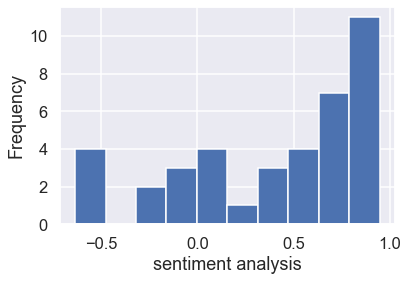

In [22]:
# this graph shows the sentiment analysis for the keyword bathroom
df_bath = sort_df('bathroom')
df_bath['compound'].plot.hist()
plt.xlabel('sentiment analysis')

In [23]:
# it shows the negetive text reviews about the bathrooms and restrooms being closed.
# there is a negetive review about bathroom but a 5 rating
df_yelp[df_yelp['text'].str.contains('bathroom')]

,id,rating,text,stem,pos,neg,neu,compound
74,Bird Park,4,Cute little park for local residents. And what I mean by local residents is because it doesn't have a bathroom facility you'll either have to walk/drive...,"[cute, littl, park, local, resid, ., and, I, mean, local, resid, n't, bathroom, facil, 'll, either, walk/driv, ...]",0.115,0.000,0.885,0.4588
110,4S Ranch Community Park,5,"Great park for kids. Large playground plus easy parking and bathrooms, and the view is amazing!! Great events are occasionally hosted there for the...","[great, park, kid, ., larg, playground, plu, easi, park, bathroom, ,, view, amaz, !, !, great, event, occasion, host, ...]",0.436,0.000,0.564,0.9476
213,Sunset View Park,4,I prefer this park over some others in Chula Vista because of two simple reasons 1. Doors on the bathroom stalls 2. Sand instead of shaved wood underneath...,"[I, prefer, park, other, chula, vista, two, simpl, reason, 1, ., door, bathroom, stall, 2, ., sand, instead, shave, wood, underneath, ...]",0.000,0.000,1.000,0.0000
217,Sunset Park,5,"Grew up going to this park, sunset park is aptly named. Cool walks that wind around the park, playground bathrooms, good grassy areas to play frisbee or...","[grew, go, park, ,, sunset, park, aptli, name, ., cool, walk, wind, around, park, ,, playground, bathroom, ,, good, grassi, area, play, frisbe, ...]",0.241,0.000,0.759,0.7650
281,Potato Chip Rock,5,-No bathroom so empty your bladder -2 miles from the Ramona fire station. No parking fee. - very steep takes 1 hour to 1 1/2 hours -yes kids can do it -...,"[-no, bathroom, empti, bladder, -2, mile, ramona, fire, station, ., No, park, fee, ., -, steep, take, 1, hour, 1, 1/2, hour, -ye, kid, -, ...]",0.076,0.250,0.674,-0.6361
318,Western Hills Park,2,"I almost got a ticket there for having my dog off leash. It's a $250,00 fine. She let me go because it's Christmas Eve. There is no bathroom for my...","[I, almost, got, ticket, dog, leash, ., It, 's, $, 250,00, fine, ., she, let, go, 's, christma, eve, ., there, bathroom, ...]",0.062,0.076,0.862,-0.1027
361,Dusty Rhodes Park,5,One of our favorite parks for our dogs. Lots of open space to play fetch. The grass is always green. The bathrooms and large parking lots are also great...,"[one, favorit, park, dog, ., lot, open, space, play, fetch, ., the, grass, alway, green, ., the, bathroom, larg, park, lot, also, great, ...]",0.167,0.000,0.833,0.6597
362,Dusty Rhodes Park,3,"We were visiting from out of town and wanted to find a playground. This park had plenty of parking, decent bathrooms and a nice playground. There's also a...","[We, visit, town, want, find, playground, ., thi, park, plenti, park, ,, decent, bathroom, nice, playground, ., there, 's, also, ...]",0.101,0.000,0.899,0.4215
372,Wells Park Dog Park,1,This place has potential to be great but the homelessness and the drug use in the parking lot kills it. Also the public bathrooms need to be burnt and...,"[thi, place, potenti, great, homeless, drug, use, park, lot, kill, ., also, public, bathroom, need, burnt, ...]",0.074,0.138,0.787,-0.4939
429,Lamar Park,1,"I have lived in spring Valley for 4 years, there's too many homeless I can't even take my siblings to this park anymore the bathroom is nasty and We can...","[I, live, spring, valley, 4, year, ,, 's, mani, homeless, I, ca, n't, even, take, sibl, park, anymor, bathroom, nasti, We, ...]",0.000,0.122,0.878,-0.5574


Text(0.5, 0, 'sentiment analysis')

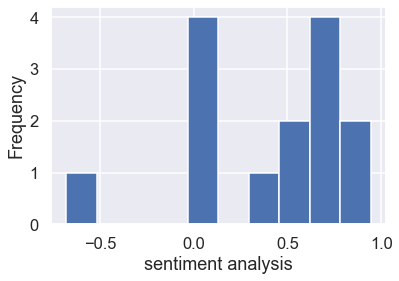

In [24]:
# I have used bathroom in the pervious cell but some people write restrooms.
df_rest = sort_df('restroom')
df_rest['compound'].plot.hist()
plt.xlabel('sentiment analysis')

In [25]:
#check if pattern is contained within a string of a Series.
df_yelp[df_yelp['text'].str.contains('restroom')]

,id,rating,text,stem,pos,neg,neu,compound
63,Hilltop Park and Recreation Center,5,"The Yelp reviewers are right about this park. The high elevation gives you spectacular views. There is plenty of parking, and there are restrooms. There...","[the, yelp, review, right, park, ., the, high, elev, give, spectacular, view, ., there, plenti, park, ,, restroom, ., there, ...]",0.000,0.000,1.000,0.0000
258,Iron Mountain,5,Took a hike a few days ago with the fam. Unfortunately due to COVID.. the restrooms were closed. I was glad to see a hand washing station provided though...,"[took, hike, day, ago, fam, ., unfortun, due, covid.., restroom, close, ., I, glad, see, hand, wash, station, provid, though, ...]",0.203,0.078,0.719,0.5859
368,Veteran's Park Dog Park,5,"Nice big dog park, comes with friendly humans! Grassy with large area to frolic and wag tails. Also has public restrooms in the larger park area with plenty...","[nice, big, dog, park, ,, come, friendli, human, !, grassi, larg, area, frolic, wag, tail, ., also, public, restroom, larger, park, area, plenti, ...]",0.194,0.037,0.769,0.7263
376,Parkside Park,3,"This park is pretty decent. There could've been some public restrooms and expanded even further making it worth visiting. Honestly, I don't like having to...","[thi, park, pretti, decent, ., there, could, 've, public, restroom, expand, even, make, worth, visit, ., honestli, ,, I, n't, like, ...]",0.268,0.070,0.662,0.7176
482,Nobel Athletic Fields & Recreation Center,4,Great park and a solid place to hold a soccer tournament. There's also a small dog park enclosed on the side of the parking lot. The restrooms close on...,"[great, park, solid, place, hold, soccer, tournament, ., there, 's, also, small, dog, park, enclos, side, park, lot, ., the, restroom, close, ...]",0.192,0.000,0.808,0.6908
530,Greenwood Memorial Park & Mortuary,1,"They didn't have running water!!!!!! During this pandemic, you would think they would have the means for our guest to use the restroom & BE ABLE TO WASH OUR...","[they, n't, run, water, !, !, !, !, !, !, dure, pandem, ,, would, think, would, mean, guest, use, restroom, &, BE, abl, TO, wash, our, ...]",0.000,0.000,1.000,0.0000
651,Lomita Park,3,Was at park today and went to use restroom before 5 o clock to wash hands and the restroom was closed. There's a sign that says it closes a 5 o clock not...,"[wa, park, today, went, use, restroom, 5, clock, wash, hand, restroom, close, ., there, 's, sign, say, close, 5, clock, ...]",0.000,0.000,1.000,0.0000
708,"Robert Egger, Sr. - South Bay Recreation Center",1,Ugh. The restroom is the most disgusting ever. Out of toilet paper and only 1 stall has a door. What is that about? The soccer field ( yes only 1 here)...,"[ugh, ., the, restroom, disgust, ever, ., out, toilet, paper, 1, stall, door, ., what, ?, the, soccer, field, (, ye, 1, ), ...]",0.079,0.244,0.677,-0.6801
902,Ocean View Hills Neighborhood Park,3,Doesn't even have restrooms.. Which is OK I guess guess to keep the hobos out... Other than that... It's Aight,"[doe, n't, even, restrooms.., which, OK, I, guess, guess, keep, hobo, ..., other, ..., It, 's, aight]",0.140,0.000,0.860,0.4466
1286,Silver Wing Park,5,I enjoy this park. It's kept clean all of the time and it's perfect for birthday parties. This park has such nice restrooms with privacy and the area where...,"[I, enjoy, park, ., It, 's, kept, clean, time, 's, perfect, birthday, parti, ., thi, park, nice, restroom, privaci, area, ...]",0.396,0.000,0.604,0.9337


Text(0.5, 0, 'sentiment analysis')

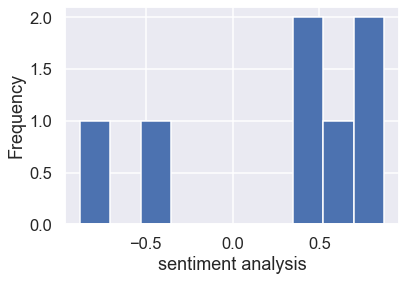

In [26]:
#we will calculate the sentiment of positive and negetive reviews 
df_drug = sort_df('drug')
df_drug['compound'].plot.hist()
plt.xlabel('sentiment analysis')

In [27]:
df_yelp[df_yelp['text'].str.contains('drug')]

,id,rating,text,stem,pos,neg,neu,compound
372,Wells Park Dog Park,1,This place has potential to be great but the homelessness and the drug use in the parking lot kills it. Also the public bathrooms need to be burnt and...,"[thi, place, potenti, great, homeless, drug, use, park, lot, kill, ., also, public, bathroom, need, burnt, ...]",0.074,0.138,0.787,-0.4939
897,Los Altos Park,1,"Saw lot's of drug deals right out in the open, kids all around. Druggies coming out of bushes. Cars, bikes, homeless buying drugs like it was legal. I...","[saw, lot, 's, drug, deal, right, open, ,, kid, around, ., druggi, come, bush, ., car, ,, bike, ,, homeless, buy, drug, like, legal, ., I, ...]",0.133,0.000,0.867,0.4588
1245,Thread Show,4,"Damn good time. Thread Show was our gateway drug for the day. First it was a $4 Trumer Pils, then it was the free wine samples... then Svedka drinks....","[damn, good, time, ., thread, show, gateway, drug, day, ., first, $, 4, trumer, pil, ,, free, wine, sampl, ..., svedka, drink, ..., .]",0.183,0.080,0.737,0.5423
1372,Pantoja Park,1,I would like them to enforce the vagrancy and illicit drug use in broad daylight. My 4 year old riding his bike and me foot pushing a scooter get yelled at...,"[I, would, like, enforc, vagranc, illicit, drug, use, broad, daylight, ., My, 4, year, old, ride, bike, foot, push, scooter, get, yell, ...]",0.085,0.000,0.915,0.3612
1554,Mesa Verde Park,3,"Park is seeing some improvement with the crime. The dog park is well maintained and a great neighborhood jewel. Yes, the drug dealers drinking in the park...","[park, see, improv, crime, ., the, dog, park, well, maintain, great, neighborhood, jewel, ., ye, ,, drug, dealer, drink, park, ...]",0.380,0.092,0.528,0.8720
1557,Mesa Verde Park,1,"Not safe. A group of hispanic males are drunk in this park daily, urinating public ally near playground, and selling drugs. Plus, horribly irresponsible dog...","[not, safe, ., A, group, hispan, male, drunk, park, daili, ,, urin, public, alli, near, playground, ,, sell, drug, ., plu, ,, horribl, irrespons, dog, ...]",0.000,0.357,0.643,-0.8781
1723,Clay Park,1,"Used to be a nice neighborhood park. Now it's become a landfill housing garbage, homeless people and their belongings. On a positive note, local drug...","[use, nice, neighborhood, park, ., now, 's, becom, landfil, hous, garbag, ,, homeless, peopl, belong, ., On, posit, note, ,, local, drug, ...]",0.242,0.000,0.758,0.7506


Text(0.5, 0, 'sentiment analysis')

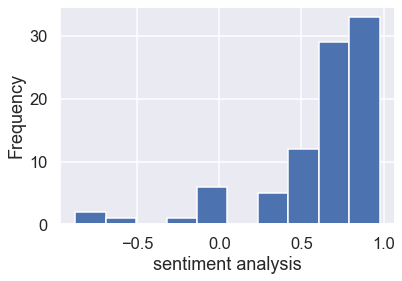

In [28]:
## check for playground
df_play = sort_df('playground')
df_play['compound'].plot.hist()
plt.xlabel('sentiment analysis')

In [29]:
df_yelp[df_yelp['text'].str.contains('playgrounds')]

,id,rating,text,stem,pos,neg,neu,compound
127,Villa Monserate Park,3,"Clean, shady community park with lots of trees, dog waste bags for dog walkers, and playgrounds with a separate play area for little tots.","[clean, ,, shadi, commun, park, lot, tree, ,, dog, wast, bag, dog, walker, ,, playground, separ, play, area, littl, tot, .]",0.183,0.100,0.717,0.3182
452,Sunnyslope Park,1,Park is in terrible condition. Both of the playgrounds have structures which are permanently blocked off.,"[park, terribl, condit, ., both, playground, structur, perman, block, .]",0.000,0.271,0.729,-0.6369
605,Serra Mesa Recreation Center,3,Cute little park that has 2 age appropriate playgrounds for 2-5 year olds and 5-12 year olds. The playgrounds themselves are in good repair and well...,"[cute, littl, park, 2, age, appropri, playground, 2-5, year, old, 5-12, year, old, ., the, playground, good, repair, well, ...]",0.204,0.000,0.796,0.7096
1315,Rolling Hills Park,4,"This little park is nice hidden gem! It offers 2 playgrounds, basket ball courts, and lots of open spaces with tables. It's very spaced out and green! It's...","[thi, littl, park, nice, hidden, gem, !, It, offer, 2, playground, ,, basket, ball, court, ,, lot, open, space, tabl, ., It, 's, space, green, !, It, 's, ...]",0.107,0.000,0.893,0.4802
1338,Torrey Del Mar Neighborhood Park,5,"This park is sooo nice! There's a huge grassy field, two great playgrounds, and a couple outdoor workout areas (complete with pull up bars and bars for...","[thi, park, sooo, nice, !, there, 's, huge, grassi, field, ,, two, great, playground, ,, coupl, outdoor, workout, area, (, complet, pull, bar, bar, ...]",0.301,0.000,0.699,0.8588
1425,Sabre Springs Park,5,"This is a wonderful park in the nice community of Sabre Springs. There are baseball fields, open fields, multiple playgrounds, and a walking/running...","[thi, wonder, park, nice, commun, sabr, spring, ., there, basebal, field, ,, open, field, ,, multipl, playground, ,, walking/run, ...]",0.255,0.000,0.745,0.7579
1623,Westview Park,4,"Nice park! I like that it's shaded and has nice play structures. I just wish that instead of wood chips, they used the rubber flooring other playgrounds...","[nice, park, !, I, like, 's, shade, nice, play, structur, ., I, wish, instead, wood, chip, ,, use, rubber, floor, playground, ...]",0.403,0.000,0.597,0.9098
2091,Carmel Creek Park,3,"This park is large, not much shade. I didn't see any public restrooms. 3 stars is for a very run down and shabby playground. Most of the playgrounds for...","[thi, park, larg, ,, much, shade, ., I, n't, see, public, restroom, ., 3, star, run, shabbi, playground, ., most, playground, ...]",0.000,0.000,1.000,0.0000


# Ethics & Privacy


 - I do not have permission from users on Yelp.   
 - There is a privacy concern with sharing people's usernames and emails.  
 - The dataset will be biased because it only represents those who use Yelp.   
   
I have solutions for these privacy concerns. I don't have permission from Yelp users, But Yelp provides us with these reviews. Therefore, Yelp has permission from its users.  
  
The privacy concern is sharing people's usernames; I will not use their username and email address in my dataset.  
  
The dataset will be biased because it is only the review of the people who use Yelp. In the U.S, most people are aware of Yelp, and most people carry a smartphone with them. It is most likely that they will use Yelp to leave a review if something is of concern. Using this dataset, I will find out what are the most concerning issues and which locations. In the future, I will send a survey to the residents of the area to get everyone's opinion.

# Conclusion & Discussion

Based on this analysis, I can conclude that Yelp reviews show the park-goers' safety concerns, but it does not encompass all the potential problems. Yelp is a social and free site for everything local. If people want to have a good weekend, they check the reviews and ratings on Yelp.  
  
  I liked that the dataset had the park's name and id, making it easier to find out which parks are the most concerning. I hypothesized that people give negative reviews on Yelp, the data i found agreed, but it was small in size. The filtering by keywords and plotting of the histogram shows the frequency of negative or positive comments. The data frame is then filtered to show only the comments from the keyword search and their respective sentiment ratings.  
    
   The results were intriguing; I found safety concerns in positive and negative reviews. Yelp is a vast review site people write anything they like or dislike. I think Yelp is an excellent source to get the datasets. Looking forward, a way to improve this project is to perform a specific survey on safety issues. Looking at the reviews, I can tell that San Diego's park and recreation department should focus on better facilities, like restrooms, playgrounds, and safety concerns such as drug and alcohol use.  
     
   The only problem with this project is that I could not see the entire text of the reviews; it only showed a part of it. To combat this problem, I used the line of code, pd.set_option('display.max_colwidth', None), to view more text; however, some text remained hidden for the very long comments.
